# Viewing the results of the 1ZoneUncontrolled simulation run

## 1. Introduction

This notebook shows how to use the `EPResult` class within the eprun package to view the results of an EnergyPlus simulation.

- Documentation on the `EPResult` class: https://eprun.readthedocs.io/en/latest/EPResult.html


## 2. Setup

### Module imports

This imports the `eprun` function from the eprun package, as well as the `os` package for working with files.

In [3]:
from eprun import eprun
import os

## 3. Simulation run

The `eprun` function is used to run the EnergyPlus simulation. The code below runs a simulation and returns an `EPResult` object.

In [4]:
epresult=eprun(ep_dir='C:\EnergyPlusV9-4-0',
               input_filepath=r'input_files\1ZoneUncontrolled.idf',
               epw_filepath=r'input_files\USA_CO_Golden-NREL.724666_TMY3.epw',
               sim_dir='simulation_files')
print(type(epresult))

<class 'eprun.epresult.EPResult'>


See [Demo - Running an EnergyPlus Simulation](https://eprun.readthedocs.io/en/latest/Demo%20-%20Running%20an%20EnergyPlus%20Simulation.html) for more details.

## 4. Viewing the output files filepaths

Following a successful EnergyPlus simulation run, the filepaths of the EnergyPlus output files of the simulation are stored as a dictionary in the `files` property of the `EPResult` object.

In [8]:
{k:os.path.relpath(v) for k,v in epresult.files.items()}

{'audit': 'simulation_files\\eplusout.audit',
 'bnd': 'simulation_files\\eplusout.bnd',
 'dxf': 'simulation_files\\eplusout.dxf',
 'eio': 'simulation_files\\eplusout.eio',
 'end': 'simulation_files\\eplusout.end',
 'err': 'simulation_files\\eplusout.err',
 'eso': 'simulation_files\\eplusout.eso',
 'mdd': 'simulation_files\\eplusout.mdd',
 'mtd': 'simulation_files\\eplusout.mtd',
 'mtr': 'simulation_files\\eplusout.mtr',
 'rdd': 'simulation_files\\eplusout.rdd',
 'shd': 'simulation_files\\eplusout.shd',
 'csv': 'simulation_files\\eplustbl.csv',
 'htm': 'simulation_files\\eplustbl.htm',
 'tab': 'simulation_files\\eplustbl.tab',
 'txt': 'simulation_files\\eplustbl.txt',
 'xml': 'simulation_files\\eplustbl.xml'}

The `files` property stores the absolute filepaths of the output files. The code above converts these to relative filepaths to avoid printing the entire directory structure of the local computer which this notebook is running on.

## 5. Viewing the 'end' file

The '.end' file is a single line text file which reports on the simulation run. It is viewed using the `get_end` method.

In [10]:
end=epresult.get_end()
print(type(end))

<class 'eprun.epend.EPEnd'>


The `line` property returns the single line of text in the file.

In [12]:
end.line

'EnergyPlus Completed Successfully-- 0 Warning; 0 Severe Errors; Elapsed Time=00hr 00min  2.42sec\n'

## 6. Viewing the 'err' file

The '.err' file s a text file which details any errors encountered during the simulation run. It is accessed using the `get_err` method.

In [13]:
err=epresult.get_err()
err

In this case there were no errors. The entire .err file text can be seen using the `lines` property.

In [15]:
err.lines

['Program Version,EnergyPlus, Version 9.4.0-998c4b761e, YMD=2020.12.30 06:58,\n',
 '   ************* Testing Individual Branch Integrity\n',
 '   ************* All Branches passed integrity testing\n',
 '   ************* Testing Individual Supply Air Path Integrity\n',
 '   ************* All Supply Air Paths passed integrity testing\n',
 '   ************* Testing Individual Return Air Path Integrity\n',
 '   ************* All Return Air Paths passed integrity testing\n',
 '   ************* No node connection errors were found.\n',
 '   ************* Beginning Simulation\n',
 '   ************* Simulation Error Summary *************\n',
 '   ************* EnergyPlus Warmup Error Summary. During Warmup: 0 Warning; 0 Severe Errors.\n',
 '   ************* EnergyPlus Sizing Error Summary. During Sizing: 0 Warning; 0 Severe Errors.\n',
 '   ************* EnergyPlus Completed Successfully-- 0 Warning; 0 Severe Errors; Elapsed Time=00hr 00min  2.42sec\n']

## 7. Viewing the simulation results in the 'eso' file

EnergyPlus places the results of the simulation calculation in several files. One of these is the '.eso' file. This is accessed using the `get_eso` method.

In [19]:
eso=epresult.get_eso()
print(type(eso))

<class 'eprun.epeso.EPEso'>


### Simulation Environments

The '1ZoneUncontrolled.idf' input file defines three seperate simulations to be run. These represent a winter day, a summer day and an annual period. The results of these simulations are held in 'simulation environments' in the .eso file and the simulation environments can be accessed using the `get_environments` method.

In [20]:
envs=eso.get_environments()
envs

[EPEsoSimuationEnvironment(environment_title="DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB"),
 EPEsoSimuationEnvironment(environment_title="DENVER CENTENNIAL  GOLDEN   N ANN CLG 1% CONDNS DB=>MWB"),
 EPEsoSimuationEnvironment(environment_title="RUN PERIOD 1")]

The simulation environment for the winter day results can be accessed by indexing.

In [22]:
htg_env=envs[0]
print(type(htg_env))

<class 'eprun.epeso_simulation_environment.EPEsoSimulationEnviroment'>


### Accessing a summary of all time periods and variables

`EPEsoSimulationEnvironment` objects contains reported data for different recording intervals (hourly, daily etc.). 

The data includes the time periods for the data (e.g. 21st December) and the values of the variables requested (such as zone air temperatures, heating energy use etc.)

A summary of the data in the `htg_env` simulation environment is viewed using the `summary` method.

In [26]:
print(htg_env.summary())

INTERVAL DATA
Starts at 2001-12-21T00:00:00+00:00, 24 periods @ 60 minute intervals
7 - Environment - Site Outdoor Air Drybulb Temperature (C)
47 - ZONE ONE - Zone Total Internal Latent Gain Energy (J)
74 - ZONE ONE - Zone Mean Radiant Temperature (C)
75 - ZONE ONE - Zone Mean Air Temperature (C)
76 - ZONE ONE - Zone Air Heat Balance Surface Convection Rate (W)
77 - ZONE ONE - Zone Air Heat Balance Air Energy Storage Rate (W)
DAILY DATA
Starts at 2001-12-21T00:00:00+00:00, 1 periods @ 1 day intervals
51 - ZN001:WALL001 - Surface Inside Face Temperature (C)
52 - ZN001:WALL001 - Surface Outside Face Temperature (C)
53 - ZN001:WALL001 - Surface Inside Face Convection Heat Transfer Coefficient (W/m2-K)
54 - ZN001:WALL001 - Surface Outside Face Convection Heat Transfer Coefficient (W/m2-K)
55 - ZN001:WALL002 - Surface Inside Face Temperature (C)
56 - ZN001:WALL002 - Surface Outside Face Temperature (C)
57 - ZN001:WALL002 - Surface Inside Face Convection Heat Transfer Coefficient (W/m2-K)
58

Here the `htg_env` simulation environment contains 6 variables recorded at hourly intervals, 25 variables recorded at daily intervals and 3 variables recorded at monthly intervals.

### Creating a dataframe of the results

One apporach to accessing the actual data values is to create a pandas DataFrame of the data. This can be done for each of the different recording intervals.

To create a pandas DataFrame for the interval (hourly) data, the `get_interval_dataframe` method is used.

In [31]:
df=htg_env.get_interval_dataframe()
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


object_name                                  Environment  \
quantity            Site Outdoor Air Drybulb Temperature   
unit                                                   C   
value_type                                         value   
time_periods                                               
2001-12-21 00:00:00                                -15.5   
2001-12-21 01:00:00                                -15.5   
2001-12-21 02:00:00                                -15.5   
2001-12-21 03:00:00                                -15.5   
2001-12-21 04:00:00                                -15.5   
2001-12-21 05:00:00                                -15.5   
2001-12-21 06:00:00                                -15.5   
2001-12-21 07:00:00                                -15.5   
2001-12-21 08:00:00                                -15.5   
2001-12-21 09:00:00                                -15.5   
2001-12-21 10:00:00                                -15.5   
2001-12-21 11:00:00                                -15.5   
2001-12-21 12:00:00                                -15.5   
2001-12-21 13:00:00                                -15.5   
2001-12-21 14:00:00                                -15.5   
2001-12-21 15:00:00                                -15.5   
2001-12-21 16:00:00                                -15.5   
2001-12-21 17:00:00                                -15.5   
2001-12-21 18:00:00                                -15.5   
2001-12-21 19:00:00                                -15.5   
2001-12-21 20:00:00                                -15.5   
2001-12-21 21:00:00                                -15.5   
2001-12-21 22:00:00                                -15.5   
2001-12-21 23:00:00                                -15.5   

object_name                                       ZONE ONE  \
quantity            Zone Total Internal Latent Gain Energy   
unit                                                     J   
value_type                                           value   
time_periods                                                 
2001-12-21 00:00:00                                    0.0   
2001-12-21 01:00:00                                    0.0   
2001-12-21 02:00:00                                    0.0   
2001-12-21 03:00:00                                    0.0   
2001-12-21 04:00:00                                    0.0   
2001-12-21 05:00:00                                    0.0   
2001-12-21 06:00:00                                    0.0   
2001-12-21 07:00:00                                    0.0   
2001-12-21 08:00:00                                    0.0   
2001-12-21 09:00:00                                    0.0   
2001-12-21 10:00:00                                    0.0   
2001-12-21 11:00:00                                    0.0   
2001-12-21 12:00:00                                    0.0   
2001-12-21 13:00:00                                    0.0   
2001-12-21 14:00:00                                    0.0   
2001-12-21 15:00:00                                    0.0   
2001-12-21 16:00:00                                    0.0   
2001-12-21 17:00:00                                    0.0   
2001-12-21 18:00:00                                    0.0   
2001-12-21 19:00:00                                    0.0   
2001-12-21 20:00:00                                    0.0   
2001-12-21 21:00:00                                    0.0   
2001-12-21 22:00:00                                    0.0   
2001-12-21 23:00:00                                    0.0   

object_name                                                                  \
quantity            Zone Mean Radiant Temperature Zone Mean Air Temperature   
unit                                            C                         C   
value_type                                  value                     value   
time_periods                                                                  
2001-12-21 00:00:00                    -18.208645                

### Accessing time periods

The time period data can be accessed directly. For the interval time data, the `get_interval_periods` method is used.

In [37]:
p=htg_env.get_interval_periods()
print(type(p))

<class 'eprun.epeso_interval_periods.EPEsoIntervalPeriods'>


The `EPEsoIntervalPeriods` class contains properties and methods to access the raw time data in the .eso file and also to generate useful outputs. For example, the `get_start_time` method returns the start times of the timestamps as Python datetime objects.

In [35]:
p.get_start_times()

(datetime.datetime(2001, 12, 21, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 1, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 2, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 3, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 4, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 5, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 6, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 7, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 8, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 9, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 10, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 11, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2001, 12, 21, 13, 0, tzinfo=datetime.timezone.utc),
 datetime.dateti

### Accessing variable data

The variable data can be accessed directly. For the interval time data, the `get_interval_variable` method is used by passing the 'report code' for the variable requested.

In [38]:
v=htg_env.get_interval_variable(75)
v

EPEsoIntervalVariable(report_code=75)

The `EPEsoIntervalVariable` class contains properties and methods to access the raw time data in the .eso file and also to generate useful outputs. For example:

- the meta data for the variable can be accessed using the `report_code`, `object_name`, `quantity` and `unit` properties. 
- the calculated values can also be accessed using the `values` property.

In [43]:
v.report_code, v.object_name, v.quantity, v.unit

(75, 'ZONE ONE', 'Zone Mean Air Temperature', 'C')

In [44]:
print(v.values)

(-18.21135382055016, -18.21143504005103, -18.211514976728836, -18.21159365081663, -18.211671082229408, -18.21174729056902, -18.211822295129068, -18.21189611489972, -18.211968768572447, -18.212040274544684, -18.212110650924444, -18.212179915534794, -18.21224808591835, -18.21231517934165, -18.212381212799478, -18.21244620301911, -18.21251016646446, -18.212573119340302, -18.212635077596218, -18.212696056930668, -18.21275607279486, -18.21281514039671, -18.21287327470455, -18.212930490450958)


### Plotting results

Simple plots can be created by using the `plot` method of the `EPEsoIntervalVariable` class.

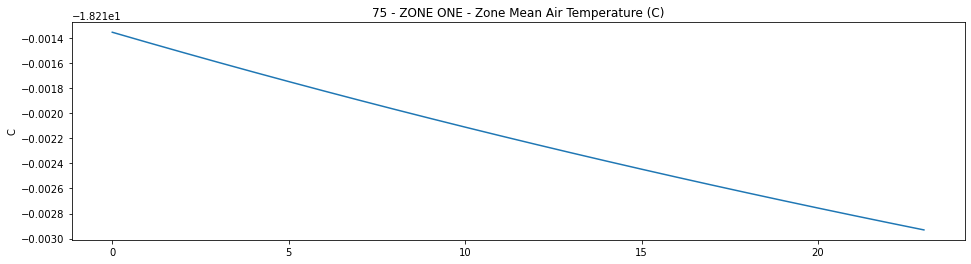

In [45]:
v.plot()

A more interesting plot is seen by looking at the zone mean air temperature for the summer day simulation.

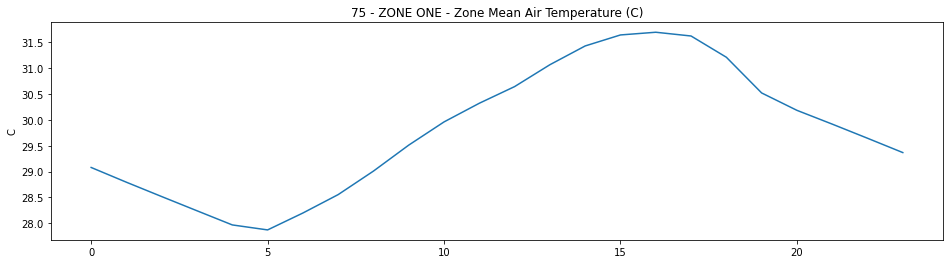

In [47]:
clg_env=envs[1]
clg_env.get_interval_variable(75).plot()

## 8. Further examples using the eso file

### A printout of all monthly data recorded in the eso file

In [55]:
for env in eso.get_environments():
    print(env.environment_title)
    print(env.get_monthly_summary())
    print('---')

DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB
Starts at 2001-12-01T00:00:00+00:00, 1 periods @ 1 month intervals
48 - TEST 352A - Other Equipment Total Heating Energy (J)
49 - ZONE ONE - Zone Other Equipment Total Heating Energy (J)
50 - TEST 352 MINUS - Other Equipment Total Heating Energy (J)
---
DENVER CENTENNIAL  GOLDEN   N ANN CLG 1% CONDNS DB=>MWB
Starts at 2001-07-01T00:00:00+00:00, 1 periods @ 1 month intervals
48 - TEST 352A - Other Equipment Total Heating Energy (J)
49 - ZONE ONE - Zone Other Equipment Total Heating Energy (J)
50 - TEST 352 MINUS - Other Equipment Total Heating Energy (J)
---
RUN PERIOD 1
Starts at 2001-01-01T00:00:00+00:00, 12 periods @ 1 month intervals
48 - TEST 352A - Other Equipment Total Heating Energy (J)
49 - ZONE ONE - Zone Other Equipment Total Heating Energy (J)
50 - TEST 352 MINUS - Other Equipment Total Heating Energy (J)
---


### A table of the daily data in the winter day simulation environment

In [58]:
htg_env=eso.get_environment('DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB')
df=htg_env.get_daily_dataframe().transpose()
df

time_periods                                                         2001-12-21 00:00:00
object_name   quantity                        unit value_type                           
ZN001:WALL001 Surface Inside Face Temperature C    value                         -18.145
                                                   min_value                    -18.1458
                                                   min_time    2001-12-21 23:59:00+00:00
                                                   max_value                    -18.1442
                                                   max_time    2001-12-21 00:14:00+00:00
...                                                                                  ...
Environment   Site Day Type Index             -    value                              10
                                                   min_value                          10
                                                   min_time    2001-12-21 00:14:00+00:00
                                                   max_value                          10
                                                   max_time    2001-12-21 00:14:00+00:00

[125 rows x 1 columns]

### Plotting all hourly data in the 'RUN PERIOD 1' simulation environment

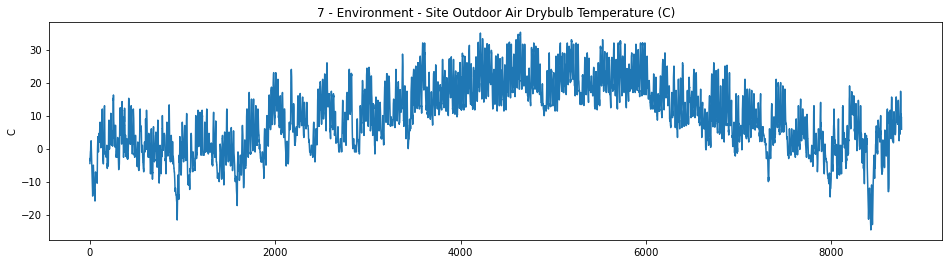

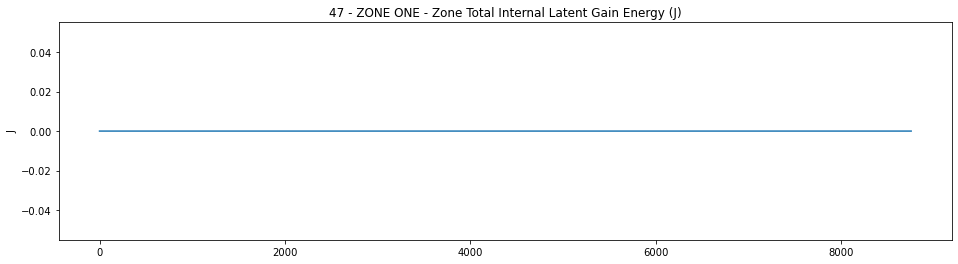

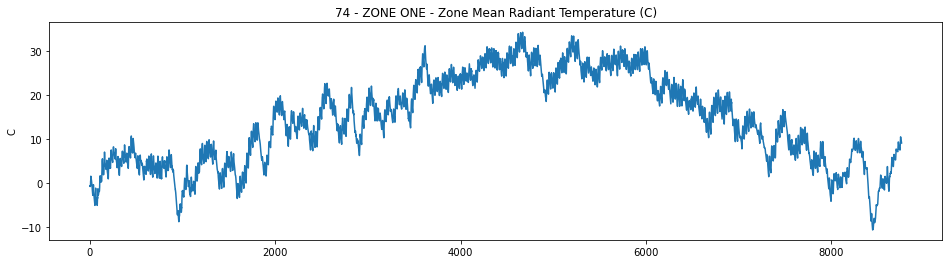

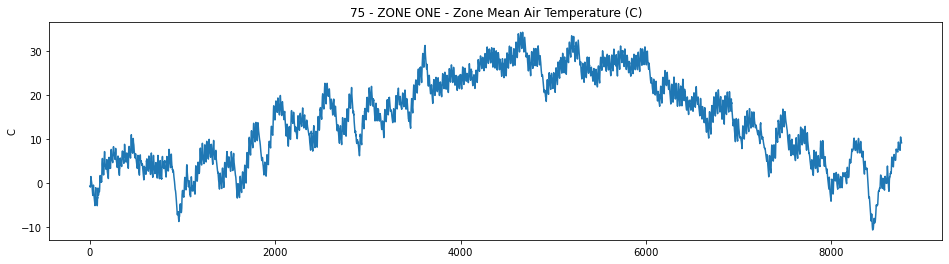

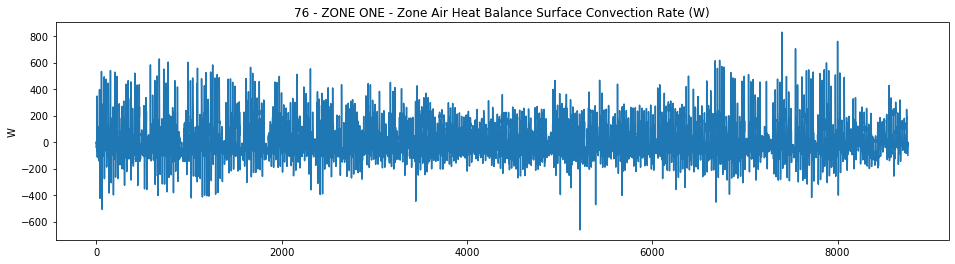

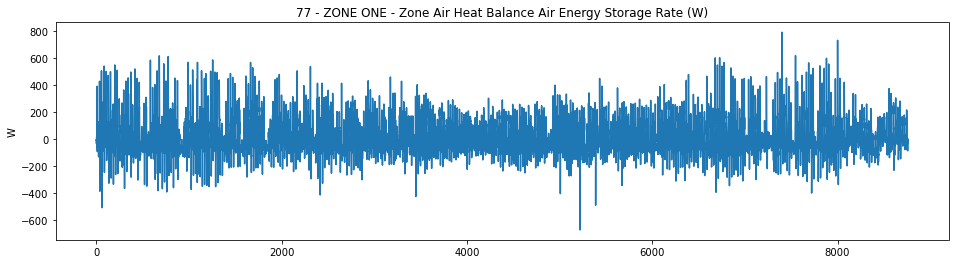

In [50]:
rp1_env=eso.get_environment('RUN PERIOD 1')
for v in rp1_env.get_interval_variables():
    v.plot()